<a href="https://colab.research.google.com/github/JP109/ML-Basics/blob/main/matplotlib/Histograms_and_Binnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 1D Histograms, binning and density**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

(array([ 14.,  51., 116., 177., 238., 185., 120.,  73.,  17.,   9.]),
 array([-2.66326087, -2.09683551, -1.53041015, -0.96398479, -0.39755943,
         0.16886593,  0.73529129,  1.30171665,  1.86814201,  2.43456737,
         3.00099273]),
 <a list of 10 Patch objects>)

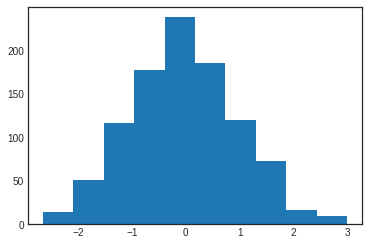

In [2]:
plt.hist(data)

The hist() function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

(array([0.02118549, 0.02648187, 0.02648187, 0.09003834, 0.08474197,
        0.09533471, 0.19066943, 0.1959658 , 0.22774404, 0.22244767,
        0.28070777, 0.43430259, 0.43959896, 0.38133886, 0.43959896,
        0.31248601, 0.31778238, 0.34956062, 0.23833679, 0.21185492,
        0.18537306, 0.1377057 , 0.11652021, 0.13240933, 0.04766736,
        0.02118549, 0.02118549, 0.03177824, 0.00529637, 0.01059275]),
 array([-2.66326087, -2.47445242, -2.28564397, -2.09683551, -1.90802706,
        -1.71921861, -1.53041015, -1.3416017 , -1.15279325, -0.96398479,
        -0.77517634, -0.58636789, -0.39755943, -0.20875098, -0.01994253,
         0.16886593,  0.35767438,  0.54648283,  0.73529129,  0.92409974,
         1.11290819,  1.30171665,  1.4905251 ,  1.67933356,  1.86814201,
         2.05695046,  2.24575892,  2.43456737,  2.62337582,  2.81218428,
         3.00099273]),
 <a list of 1 Patch objects>)

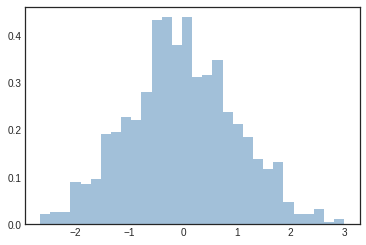

In [8]:
plt.hist(data, density=True, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

Comparing histograms with histtype='stepfilled' along with some transparency alpha (density=True makes area under graph = 1)

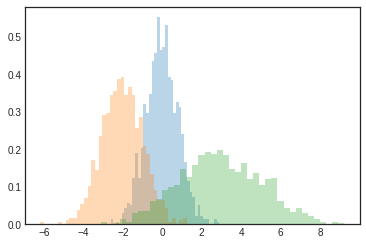

In [9]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## **2. 2D Histograms, binning and density**
We can also create histograms in two-dimensions by dividing points among two-dimensional bins. 

In [10]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

**plt.hist2d**

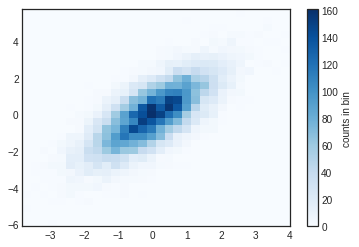

In [11]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with plt.hist, plt.hist2d has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring. Further, just as plt.hist has a counterpart in np.histogram, plt.hist2d has a counterpart in np.histogram2d, which can be used as follows:

In [12]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the np.histogramdd function.

**plt.hexbin: Hexagonal binnings**

The two-dimensional histogram creates a tesselation of squares across the axes. Another natural shape for such a tesselation is the regular hexagon. For this purpose, Matplotlib provides the plt.hexbin routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

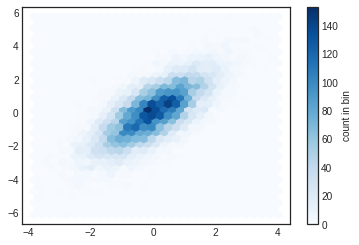

In [13]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## **3. Kernel Density Estimator**

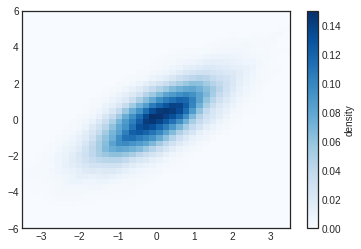

In [14]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")